# Tarea 13 - Sebastián Negrete Aragón - Física Computacional
# Semestre 2017-2

In [1]:
using PyPlot

## Códigos de Euler y Runge-Kutta de orden 4

In [2]:
#Donde comente es donde radican las variaciones que permitiran realizar de una manera más simple el manejo de varias condiciones iniciales
function metodo_euler(f,listat,x0)
    longitud=length(listat)
    x=x0
    h=listat[2]-listat[1]
    listax=[] #Solo declaro a listax como un arreglo vacío
    push!(listax,x) #Aplico push! para agregar un valor a la listax el valor x0 que es la condición inicial
    for i in 2:longitud #El Ciclo for ahora corre de i=2 hasta que haya usado todos los valores de la listat
        t=listat[i] #Para usar el elemento t correspondiente a la iteración
        x=x+f(x,t)*h #Aplicando el método de Euler
        push!(listax,x) #Agrego el valor encontrado a la listax el valor de x que encontré
    end
    return listax #Regresó el arreglo
end

metodo_euler (generic function with 1 method)

In [3]:
#Donde comente es donde radican las variaciones que permitiran realizar de una manera más simple el manejo de varias condiciones iniciales
function RungeKutta4(f,listat,x0)
    longitud=length(listat)
    x=x0
    l=(listat[2]-listat[1])/2
    listax=[] #Solo declaro a listax como un arreglo vacío
    push!(listax,x) #Aplico push! para agregar un valor a la listax el valor x0 que es la condición inicial
    for i in 2:length(listat) #El Ciclo for ahora corre de i=2 hasta que haya usado todos los valores de la listat
        t=listat[i] #Para usar el elemento t correspondiente a la iteración
        k1=f(x,t) #Encontramos k1 ahora usando x,t en vez de explicitamente indicar los elementos de una lista
        k2=f(x+l*k1,t+l)
        k3=f(x+l*k2,t+l)
        k4=f(x+2l*k3,t+2l)
        x=x+(l/3)*(k1+2k2+2k3+k4) #Aplicamos el método de Runge-Kutta
        push!(listax,x) #Salvo el valor de x en listax
    end
    return listax #Regreso el arreglo
end

RungeKutta4 (generic function with 1 method)

## Ejercicio 1

Se pide resolver el oscilador armónico amortiguado, la ecuación diferencial requerida para esto es:

$$\ddot{x}=-kx-b\dot{x},\:k,b>0$$

$$m=1\:\mathrm{kg}$$
$$k=1\:\mathrm{N/m}$$
$$b=1\:\mathrm{kg/s}$$
$$x(0)=1\:\mathrm{m}$$
$$\dot{x}(0)=0\:\mathrm{m/s}$$
$$t\in(0,10)$$

Ahora, si tomamos $u(t)=\dot{x}(t)$, entonces:

$$\left\{\begin{array}{ll}
\dot{x}=u, & x_{0}=x(0)\\
\dot{u}=-kx-b\dot{x}, & u_{0}=\dot{x}(0)
\end{array}\right.$$

Es decir $\mathbf{x}(t)=(x(t),u(t))$ y $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-kx(t)-b\dot{x}(x))$, entonces:

$$\frac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t),$$

con la condición inicial $\mathbf{x}_{0}=\mathbf{x}(0)$.

Damos $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-kx(t)-b\dot{x}(x))$

In [4]:
#Implementación
f(x,t)=[x[2],-x[1]-x[2]]

f (generic function with 1 method)

In [5]:
#Lista para evaluar distintas t
listat=0:0.1:10 #Intervalo de t con h=0.1

0.0:0.1:10.0

In [6]:
arregloE=metodo_euler(f,listat,[1,0]) #x(0)=1, x'(0)=0

101-element Array{Any,1}:
 [1, 0]                    
 [1.0, -0.1]               
 [0.99, -0.19]             
 [0.971, -0.27]            
 [0.944, -0.3401]          
 [0.90999, -0.40049]       
 [0.869941, -0.45144]      
 [0.824797, -0.49329]      
 [0.775468, -0.526441]     
 [0.722824, -0.551344]     
 [0.66769, -0.568492]      
 [0.61084, -0.578411]      
 [0.552999, -0.581654]     
 ⋮                         
 [0.00491138, -0.0168851]  
 [0.00322287, -0.0156877]  
 [0.00165409, -0.0144413]  
 [0.000209968, -0.0131625] 
 [-0.00110629, -0.0118673] 
 [-0.00229301, -0.0105699] 
 [-0.00335001, -0.00928363]
 [-0.00427837, -0.00802027]
 [-0.0050804, -0.00679041] 
 [-0.00575944, -0.00560332]
 [-0.00631977, -0.00446705]
 [-0.00676647, -0.00338837]

In [7]:
#Con la función `map` vamos a poder definir dos listas a partir del arrregloE:
listaxE1=map(x->x[1],arregloE) #Aquí tomamos el primer flotante de cada entrada y hacemos un arreglo que llamaremos listaxE1
listaxE2=map(x->x[2],arregloE) #Aquí tomamos el segundo flotante de cada entrada y hacemos un arreglo que llamaremos listaxE2

101-element Array{Real,1}:
  0         
 -0.1       
 -0.19      
 -0.27      
 -0.3401    
 -0.40049   
 -0.45144   
 -0.49329   
 -0.526441  
 -0.551344  
 -0.568492  
 -0.578411  
 -0.581654  
  ⋮         
 -0.0168851 
 -0.0156877 
 -0.0144413 
 -0.0131625 
 -0.0118673 
 -0.0105699 
 -0.00928363
 -0.00802027
 -0.00679041
 -0.00560332
 -0.00446705
 -0.00338837

In [8]:
arregloRK4=RungeKutta4(f,listat,[1,0]) #x(0)=1, x'(0)=0

101-element Array{Any,1}:
 [1, 0]                     
 [0.995167, -0.0950042]     
 [0.981331, -0.180064]      
 [0.959481, -0.255318]      
 [0.930587, -0.320982]      
 [0.895595, -0.377346]      
 [0.855417, -0.424758]      
 [0.810928, -0.463619]      
 [0.762963, -0.494374]      
 [0.712308, -0.517502]      
 [0.6597, -0.533508]        
 [0.605826, -0.542918]      
 [0.551319, -0.54627]       
 ⋮                          
 [0.00837364, -0.0133411]   
 [0.0070657, -0.0128047]    
 [0.00581504, -0.0121976]   
 [0.00462811, -0.0115323]   
 [0.00351013, -0.0108206]   
 [0.00246516, -0.0100738]   
 [0.00149619, -0.00930225]  
 [0.000605209, -0.00851568] 
 [-0.000206742, -0.007723]  
 [-0.000939459, -0.00693231]
 [-0.00159352, -0.00615095] 
 [-0.00217018, -0.00538547] 

In [9]:
listaxRK4_1=map(x->x[1],arregloRK4) #Aquí tomamos el primer flotante de cada entrada y hacemos un arreglo que llamaremos listaxRK4_1
listaxRK4_2=map(x->x[2],arregloRK4) #Aquí tomamos el segundo flotante de cada entrada y hacemos un arreglo que llamaremos listaRK4_2

101-element Array{Real,1}:
  0         
 -0.0950042 
 -0.180064  
 -0.255318  
 -0.320982  
 -0.377346  
 -0.424758  
 -0.463619  
 -0.494374  
 -0.517502  
 -0.533508  
 -0.542918  
 -0.54627   
  ⋮         
 -0.0133411 
 -0.0128047 
 -0.0121976 
 -0.0115323 
 -0.0108206 
 -0.0100738 
 -0.00930225
 -0.00851568
 -0.007723  
 -0.00693231
 -0.00615095
 -0.00538547

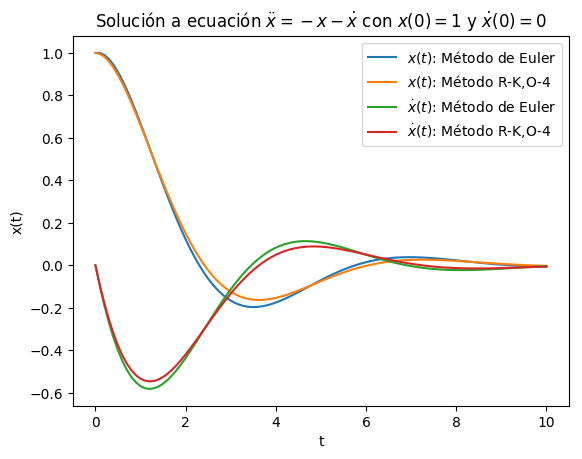

In [10]:
#Graficamos x(t) y v(t)
plot(listat,listaxE1,label=L"$x(t)$: Método de Euler")
plot(listat,listaxRK4_1,label=L"$x(t)$: Método R-K,O-4")
plot(listat,listaxE2,label=L"$\dot{x}(t)$: Método de Euler")
plot(listat,listaxRK4_2,label=L"$\dot{x}(t)$: Método R-K,O-4")
title(L"Solución a ecuación $\ddot{x}=-x-\dot{x}$ con $x(0)=1$ y $\dot{x}(0)=0$")
xlabel("t")
ylabel("x(t)")
legend()
show()

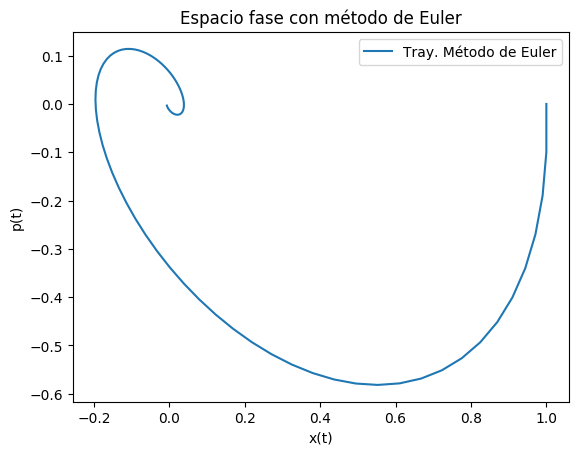

In [11]:
#Graficando (x(t),p(t))
plot(listaxE1,listaxE2,label="Tray. Método de Euler")
title("Espacio fase con método de Euler")
xlabel("x(t)")
ylabel("p(t)")
legend()
show()

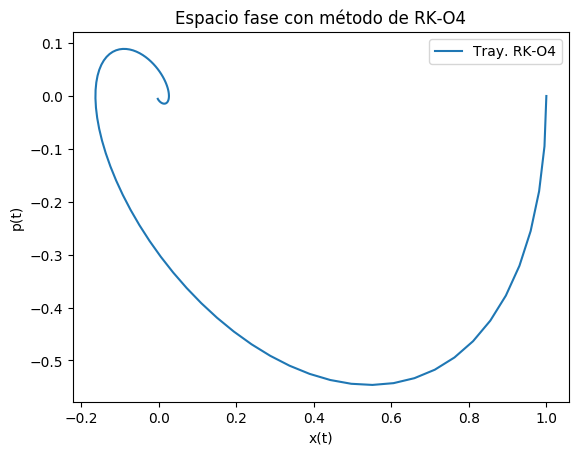

In [12]:
#Graficando (x(t),p(t))
plot(listaxRK4_1,listaxRK4_2,label="Tray. RK-O4")
title("Espacio fase con método de RK-O4")
xlabel("x(t)")
ylabel("p(t)")
legend()
show()

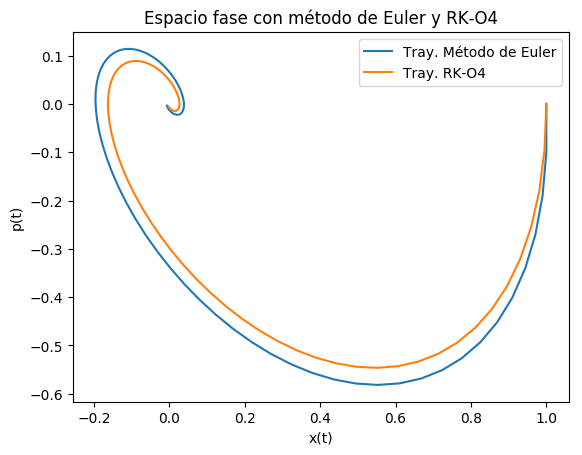

In [13]:
#Graficando (x(t),p(t))
plot(listaxE1,listaxE2,label="Tray. Método de Euler")
plot(listaxRK4_1,listaxRK4_2,label="Tray. RK-O4")
title("Espacio fase con método de Euler y RK-O4")
xlabel("x(t)")
ylabel("p(t)")
legend()
show()

Notamos que la trayectoria del método de Euler en los extremos del intervalo de $t$ se aproxima a la del método de Runge-Kutta de orden 4, diferiendo de manera ligera en el resto de la trayectoria.

## Ejercicio 2

Ahora se pide resolver el péndulo simple con diversas condiciones iniciales, la ecuación diferencial que se satisface es:
$$\ell\ddot{\theta}=-g\mathrm{sin}(\theta)$$
Se imponen las siguientes condiciones a los valores:
$$\ell=1,\:g=1$$
De nueva cuenta considerando $u(t)=\dot{\theta}(t)$, entonces:

$$\left\{\begin{array}{ll}
\dot{\theta}=u, & \theta_{0}=\theta(0)\\
\dot{u}=-\displaystyle\frac{g}{\ell}\mathrm{sin}(\theta), & u_{0}=\dot{\theta}(0)
\end{array}\right.$$

Es decir $\mathbf{\theta}(t)=(\theta(t),u(t))$ y $\:\boldsymbol{g}(\mathbf{\theta},t)=\left(u(t),-\displaystyle\frac{g}{\ell}\mathrm{sin}(\theta(t))\right)$

Resolveremos en $t\in(0,10)$ usando solamente Runge-Kutta de orden 4

Damos $\:\boldsymbol{g}(\mathbf{\theta},t)=\left(u(t),-\displaystyle\frac{g}{\ell}\mathrm{sin}(\theta(t))\right)$

In [14]:
#Implementación g=l=1
g(x,t)=[x[2],-sin.(x[1])]

g (generic function with 1 method)

In [15]:
#Condición inicial theta(0)=0, v(0)=1
#Usamos h=0.1
arregloPS1=RungeKutta4(g,listat,[0,1])
#Condición inicial x(0)=1, v(0)=2
arregloPS2=RungeKutta4(g,listat,[1,2])
#Condición inicial x(0)=2, v(0)=4
arregloPS3=RungeKutta4(g,listat,[2,4])
#Condición inicial x(0)=3, v(0)=5
arregloPS4=RungeKutta4(g,listat,[3,5])
#Condición inicial x(0)=4, v(0)=6
arregloPS5=RungeKutta4(g,listat,[4,6])

101-element Array{Any,1}:
 [4, 6]            
 [4.60432, 6.09029]
 [5.21827, 6.1868] 
 [5.84069, 6.25418]
 [6.46725, 6.26687]
 [7.09205, 6.21997]
 [7.70984, 6.13144]
 [8.31804, 6.03424]
 [8.91757, 5.96314]
 [9.51238, 5.94264]
 [10.108, 5.97965] 
 [10.7098, 6.06164]
 [11.3209, 6.16008]
 ⋮                 
 [58.3781, 6.06592]
 [58.9803, 5.98248]
 [59.5761, 5.94305]
 [60.1708, 5.96099]
 [60.77, 6.03024]  
 [61.3778, 6.12698]
 [61.9952, 6.21666]
 [62.6198, 6.26596]
 [63.2464, 6.25601]
 [63.8691, 6.19065]
 [64.4835, 6.0947] 
 [65.0882, 6.00339]

In [16]:
#Función que simplifica a `map`
function ent(lista,entrada)
    listent=map(x->x[entrada],lista)
    return listent
end

ent (generic function with 1 method)

In [17]:
#Obteniendo las listas de las entradas
PS1_1=ent(arregloPS1,1)
PS1_2=ent(arregloPS1,2)
PS2_1=ent(arregloPS2,1)
PS2_2=ent(arregloPS2,2)
PS3_1=ent(arregloPS3,1)
PS3_2=ent(arregloPS3,2)
PS4_1=ent(arregloPS4,1)
PS4_2=ent(arregloPS4,2)
PS5_1=ent(arregloPS5,1)
PS5_2=ent(arregloPS5,2)

101-element Array{Real,1}:
 6      
 6.09029
 6.1868 
 6.25418
 6.26687
 6.21997
 6.13144
 6.03424
 5.96314
 5.94264
 5.97965
 6.06164
 6.16008
 ⋮      
 6.06592
 5.98248
 5.94305
 5.96099
 6.03024
 6.12698
 6.21666
 6.26596
 6.25601
 6.19065
 6.0947 
 6.00339

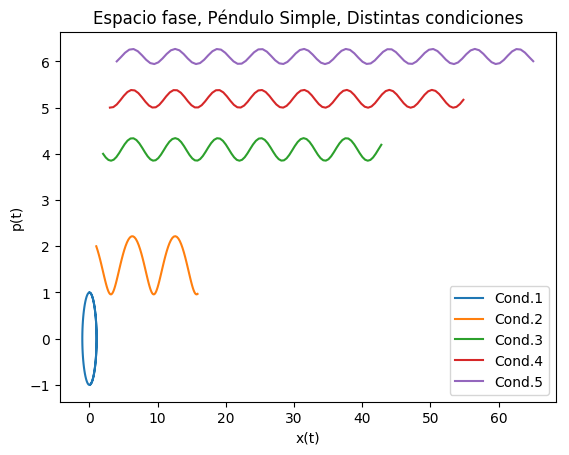

In [18]:
#Graficando (x(t),p(t))
plot(PS1_1,PS1_2,label="Cond.1")
plot(PS2_1,PS2_2,label="Cond.2")
plot(PS3_1,PS3_2,label="Cond.3")
plot(PS4_1,PS4_2,label="Cond.4")
plot(PS5_1,PS5_2,label="Cond.5")
title("Espacio fase, Péndulo Simple, Distintas condiciones")
xlabel("x(t)")
ylabel("p(t)")
legend()
show()

Para graficar varias soluciones ocuparemos el siguiente código

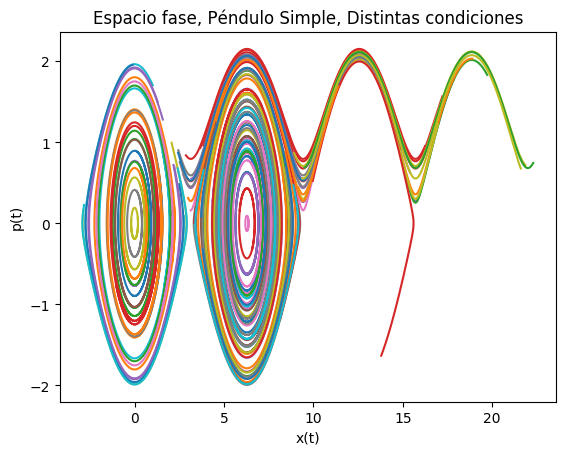

In [19]:
listat_ps=0:0.01:10 #Para tener un mayor de puntos a graficar partimos el intervalo [0,10] en mil partes
for i in 1:100 #Iteración for, la cantidad de veces efectuada es la cantidad de gráficas obtenidas
    a=10*(2*rand(1)-1) #a sirve para generar condiciones iniciales arbitrarias para x
    b=2*rand(1)-1 #b sirve para generar condiciones iniciales arbitrarias para x'
    listarandps=RungeKutta4(g,listat_ps,[abs.(a),abs.(b)]) #Aplicación Runge Kutta
    PS_x=ent(listarandps,1) #Aplico la función ent que definí para obtener la primera entrada de la lista
    PS_p=ent(listarandps,2) #Aplico ahora para la segunda entrada
    plot(PS_x,PS_p) #Grafico
    title("Espacio fase, Péndulo Simple, Distintas condiciones")
    xlabel("x(t)")
    ylabel("p(t)")
end

Notamos que existen dos tipos de curvas que induce nuestra solución: cerradas y abiertas. Las curvas cerradas están localizadas alrededor de puntos fijos en el eje horizontal y se pueden encontrar recordando que: $\:\boldsymbol{g}(\mathbf{\theta},t)=\left(u(t),-\mathrm{sin}(\theta(t))\right)=\bar{0}$ siendo que esto pasa si $u(t)=0$ y $\mathrm{sin}(\theta(t))=0$ la periodicidad de puntos en dicho eje se debe a que $u(t)$ depende de $-\mathrm{sin}(\theta(t))$.

Dado que la fuerza del péndulo simple es proporcional a $-\mathrm{sin}(\theta)$ la energía potencial es por tanto proporcional a $\mathrm{cos}(\theta)$ debido a que la fuerza gravitatoria es conservativa. Como en los puntos fijos la fuerza es igual a cero tenemos que para la energía potencial hay un máximo o un mínimo, por estabilidad tienen que ser mínimos.

Para aquellas soluciones que son curvas cerradas se tiene que la energía potencial del péndulo oscila entre la mínima y en valores menores a la máxima. Para valores máximos se tienen curvas abiertas, físicamente implicaría que el péndulo asciende hasta volver a estar alineado con su posición inicial solo para volver a descender manteniendo dicho movimiento perpetuamente, dicha solución es válida matemáticamente pero físicamente es sumamente difícil lograr algo así.

## Ejercicio 3

Se pide comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$
Además debemos comprobar que el $1$ es un _repulsor_ y el $-1$ un _atractor_.

In [20]:
#Definimos la función h como la expresión a la que está igualada  nuestra ecuación diferencial
h(x,t)=x.^2-1

h (generic function with 1 method)

In [21]:
#Para observar mejor el comportamiento de las soluciones propongo un arreglo para los valores de t de 0 a 20 con escalon de 0.01
listat_e3=0:0.01:20

0.0:0.01:20.0

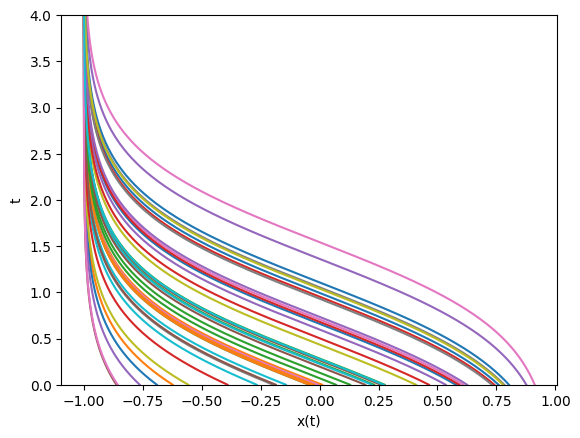

In [22]:
#Aplicamos lo visto para graficar diversas soluciones en el ejercicio 2
for i in 1:40 #Iteración for, la cantidad de veces efectuada es la cantidad de gráficas obtenidas
    c=2*rand(1)-1 #Generador de diversas condiciones iniciales, a diferencia del ejercicio anterior no se introduce un arreglo [a,b] pues es una ec. dif. de primer orden (x respecto a t, velocidad para un sistema mecánico)
    listarand_e3=RungeKutta4(h,listat_e3,c) 
    plot(listarand_e3,listat_e3) #Graficamos t vs. x pues queremos ver el comportamiento de la solución en el tiempo
    ylim([0,4]) #Imponemos un límite al eje t para observar a detalle las soluciones
    xlabel("x(t)")
    ylabel("t")
end

Se aprecia que para $x=\pm1$ se tienen puntos fijos. Temporalmente de $x=1$ las soluciones de alejan mientras que a $x=-1$ las soluciones se acercan. Concluimos que $x=1$ es un repulsor y $x=-1$ un atractor.

## Ejercicio 4

Se pide resolver numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
Encontrando el punto fijo único y definiendo si es un _atractor_ o un _repulsor_

Seguiremos un procedimiento análogo al ejercicio 3.

In [23]:
#Definimos a k como la expresión igualada a nuestra ecuación diferencial
k(x,t)=x.^2

k (generic function with 1 method)

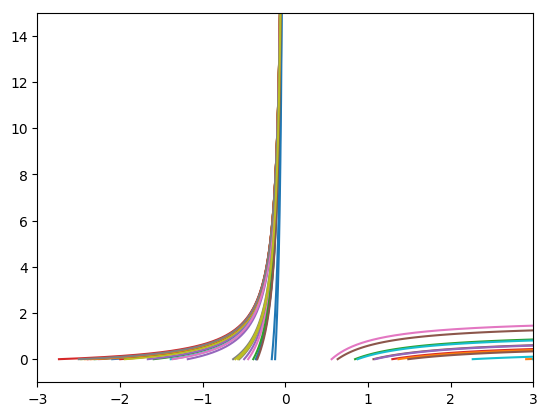

In [24]:
#Usamos la lista para valores de t `listat_e3` para este ejercicio también
for i in 1:40 #Iteración for, la cantidad de veces efectuada es la cantidad de gráficas obtenidas
    d=3*(2*rand(1)-1) #Generador de diversas condiciones iniciales, a diferencia del ejercicio anterior no se introduce un arreglo [a,b] pues es una ec. dif. de primer orden (x respecto a t, velocidad para un sistema mecánico)
    listarand_e4=RungeKutta4(k,listat_e3,d)
    plot(listarand_e4,listat_e3)
    xlim([-3,3]) #Imponemos límites para observar cercanos a cero las soluciones pues se tiene la sospecha que 0 es el punto fijo
    ylim([-1,15]) #Imponemos límites para observar el comportamiento de las soluciones respecto al tiempo.
end

Primero hemos confirmado nuestra sospecha de que $x=0$ es el único punto fijo de nuestro sistema.

Tenemos que para condiciones iniciales $x_0>0$ las soluciones se alejan de $x=0$ conforme pasa el tiempo (es un repulsor) mientras que para $x_0<0$ tenemos que se acercan a $x=0$ (es un atractor).

## Ejercicio 5

Finalmente debemos resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Para esto graficaremos los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones.
Se debe hacer para los sistemas:
* $a=c=1$, $b=d=0$
* $a=c=-1$, $b=d=0$
* $a=1$, $d=-2$, $c=b=0$
* $a=1$, $d=-0.5$, $c=b=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=d=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

Sea $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}a & b\\c & d\end{array}\right)$

In [25]:
#F es la función resultante de realizar la multiplicación de A con x, dandonos un vector columna que visualizaremos como renglón por facilidad de graficar
F(x,t)=[a*x[1]+b*x[2],c*x[1]+d*x[2]]

F (generic function with 1 method)

In [26]:
#Valores de t a usar en todos los sistemas
listat_ej5=0:0.01:20

0.0:0.01:20.0

Para $a=c=1$, $b=d=0$ se tiene entonces:
$$\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}1 & 0\\1 & 0\end{array}\right)$$

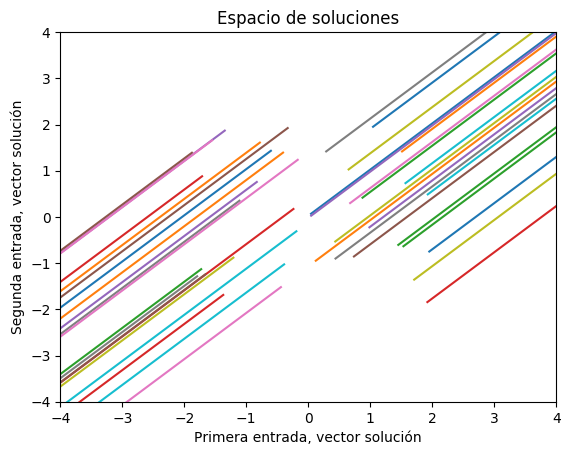

In [27]:
a,b,c,d=1,0,1,0 #Declaramos nuestras variables
for i in 1:40
    ci_1=2*(2*rand(1)-1)
    ci_2=2*(2*rand(1)-1)
    vs_1=RungeKutta4(F,listat_ej5,[ci_1,ci_2])
    E5_e1_1=ent(vs_1,1) #Aplico la función ent que definí para obtener la primera entrada de la lista
    E5_e2_1=ent(vs_1,2) #Ahora la segunda entrada
    plot(E5_e1_1,E5_e2_1)
    xlim([-4,4]) #Tomamos de -4 a 4 el rango de x
    ylim([-4,4]) #Tomamos de -4 a 4 el rango de y
    title("Espacio de soluciones")
    xlabel("Primera entrada, vector solución")
    ylabel("Segunda entrada, vector solución")
end

Para $a=c=-1$, $b=d=0$ se tiene entonces:
$$\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}-1 & 0\\-1 & 0\end{array}\right)$$

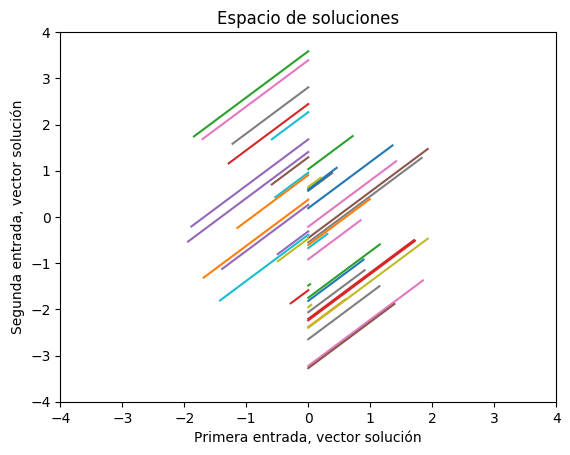

In [28]:
a,b,c,d=-1,0,-1,0 #Declaramos nuestras variables
for i in 1:40
    ci_3=2*(2*rand(1)-1)
    ci_4=2*(2*rand(1)-1)
    vs_2=RungeKutta4(F,listat_ej5,[ci_3,ci_4])
    E5_e1_2=ent(vs_2,1) #Aplico la función ent que definí para obtener la primera entrada de la lista
    E5_e2_2=ent(vs_2,2) #Ahora la segunda entrada
    plot(E5_e1_2,E5_e2_2)
    xlim([-4,4]) #Tomamos de -4 a 4 el rango de x
    ylim([-4,4]) #Tomamos de -4 a 4 el rango de y
    title("Espacio de soluciones")
    xlabel("Primera entrada, vector solución")
    ylabel("Segunda entrada, vector solución")
end

Para $a=1$, $d=-2$, $b=c=0$ se tiene entonces:
$$\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}1 & 0\\0 & -2\end{array}\right)$$

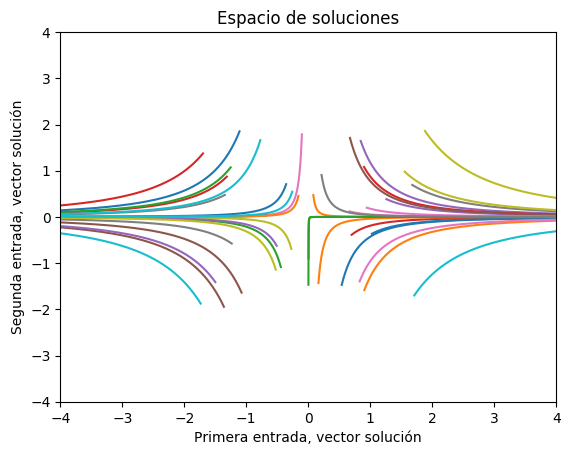

In [29]:
a,b,c,d=1,0,-0,-2 #Declaramos nuestras variables
for i in 1:40
    ci_5=2*(2*rand(1)-1)
    ci_6=2*(2*rand(1)-1)
    vs_3=RungeKutta4(F,listat_ej5,[ci_5,ci_6])
    E5_e1_3=ent(vs_3,1) #Aplico la función ent que definí para obtener la primera entrada de la lista
    E5_e2_3=ent(vs_3,2) #Ahora la segunda entrada
    plot(E5_e1_3,E5_e2_3)
    xlim([-4,4]) #Tomamos de -4 a 4 el rango de x
    ylim([-4,4]) #Tomamos de -4 a 4 el rango de y
    title("Espacio de soluciones")
    xlabel("Primera entrada, vector solución")
    ylabel("Segunda entrada, vector solución")
end

Para $a=1$, $d=-0.5$, $b=c=0$ se tiene entonces:
$$\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}1 & 0\\0 & -0.5\end{array}\right)$$

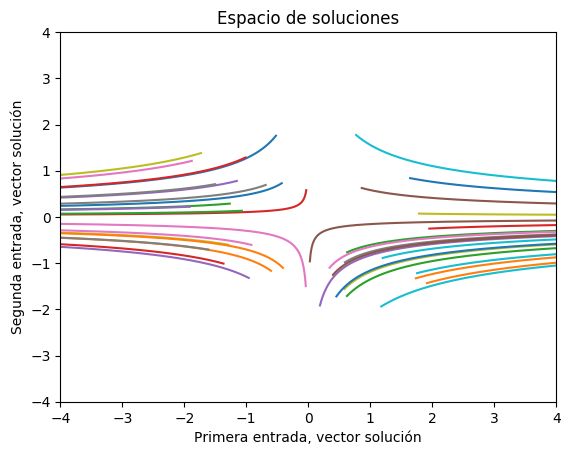

In [30]:
a,b,c,d=1,0,0,-0.5 #Declaramos nuestras variables
for i in 1:40
    ci_7=2*(2*rand(1)-1)
    ci_8=2*(2*rand(1)-1)
    vs_4=RungeKutta4(F,listat_ej5,[ci_7,ci_8])
    E5_e1_4=ent(vs_4,1) #Aplico la función ent que definí para obtener la primera entrada de la lista
    E5_e2_4=ent(vs_4,2) #Ahora la segunda entrada
    plot(E5_e1_4,E5_e2_4)
    xlim([-4,4]) #Tomamos de -4 a 4 el rango de x
    ylim([-4,4]) #Tomamos de -4 a 4 el rango de y
    title("Espacio de soluciones")
    xlabel("Primera entrada, vector solución")
    ylabel("Segunda entrada, vector solución")
end

Para $a=d=0$, $b=-c=1$ se tiene entonces:
$$\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}0 & 1\\-1 & 0\end{array}\right)$$

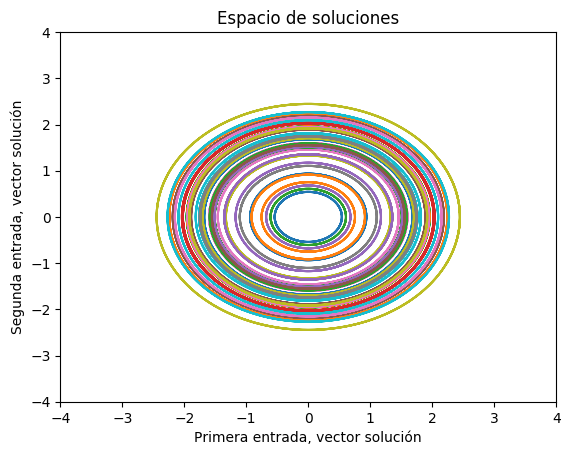

In [31]:
a,b,c,d=0,1,-1,0 #Declaramos nuestras variables
for i in 1:40
    ci_9=2*(2*rand(1)-1)
    ci_10=2*(2*rand(1)-1)
    vs_5=RungeKutta4(F,listat_ej5,[ci_9,ci_10])
    E5_e1_5=ent(vs_5,1) #Aplico la función ent que definí para obtener la primera entrada de la lista
    E5_e2_5=ent(vs_5,2) #Ahora la segunda entrada
    plot(E5_e1_5,E5_e2_5)
    xlim([-4,4]) #Tomamos de -4 a 4 el rango de x
    ylim([-4,4]) #Tomamos de -4 a 4 el rango de y
    title("Espacio de soluciones")
    xlabel("Primera entrada, vector solución")
    ylabel("Segunda entrada, vector solución")
end

Para $a=d=1$, $b=-c=1$ se tiene entonces:
$$\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}1 & 1\\-1 & 1\end{array}\right)$$

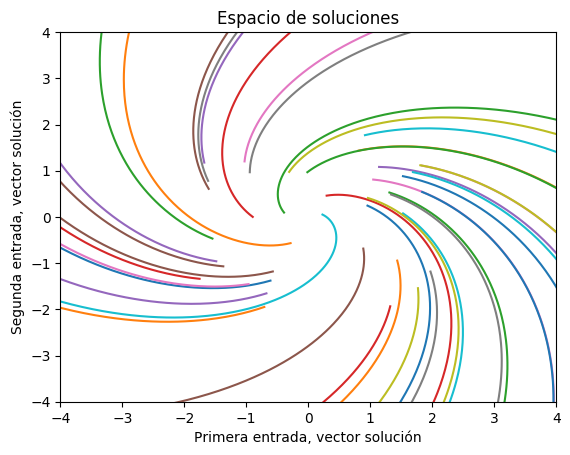

In [32]:
a,b,c,d=1,1,-1,1 #Declaramos nuestras variables
for i in 1:40
    ci_11=2*(2*rand(1)-1)
    ci_12=2*(2*rand(1)-1)
    vs_6=RungeKutta4(F,listat_ej5,[ci_11,ci_12])
    E5_e1_6=ent(vs_6,1) #Aplico la función ent que definí para obtener la primera entrada de la lista
    E5_e2_6=ent(vs_6,2) #Ahora la segunda entrada
    plot(E5_e1_6,E5_e2_6)
    xlim([-4,4]) #Tomamos de -4 a 4 el rango de x
    ylim([-4,4]) #Tomamos de -4 a 4 el rango de y
    title("Espacio de soluciones")
    xlabel("Primera entrada, vector solución")
    ylabel("Segunda entrada, vector solución")
end

Para $a=d=-1$, $b=-c=1$ se tiene entonces:
$$\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}-1 & 1\\-1 & -1\end{array}\right)$$

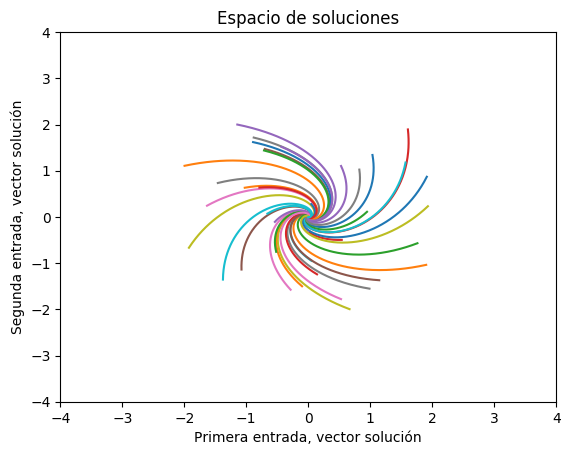

In [33]:
a,b,c,d=-1,1,-1,-1 #Declaramos nuestras variables
for i in 1:40
    ci_13=2*(2*rand(1)-1)
    ci_14=2*(2*rand(1)-1)
    vs_7=RungeKutta4(F,listat_ej5,[ci_13,ci_14])
    E5_e1_7=ent(vs_7,1) #Aplico la función ent que definí para obtener la primera entrada de la lista
    E5_e2_7=ent(vs_7,2) #Ahora la segunda entrada
    plot(E5_e1_7,E5_e2_7)
    xlim([-4,4]) #Tomamos de -4 a 4 el rango de x
    ylim([-4,4]) #Tomamos de -4 a 4 el rango de y
    title("Espacio de soluciones")
    xlabel("Primera entrada, vector solución")
    ylabel("Segunda entrada, vector solución")
end

Para $a=d=-1$, $b=-c=-1$ se tiene entonces:
$$\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}-1 & -1\\1 & -1\end{array}\right)$$

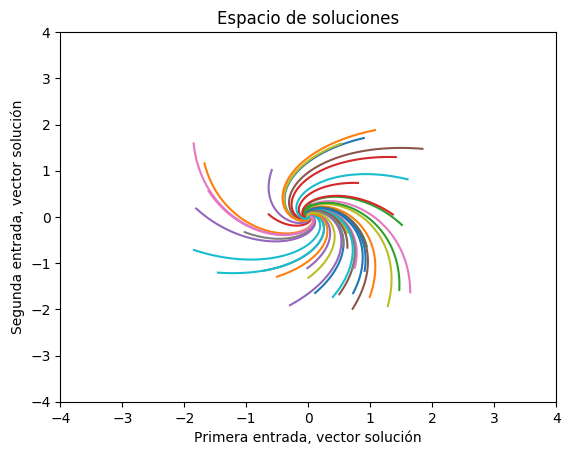

In [34]:
a,b,c,d=-1,-1,1,-1 #Declaramos nuestras variables
for i in 1:40
    ci_15=2*(2*rand(1)-1)
    ci_16=2*(2*rand(1)-1)
    vs_8=RungeKutta4(F,listat_ej5,[ci_15,ci_16])
    E5_e1_8=ent(vs_8,1) #Aplico la función ent que definí para obtener la primera entrada de la lista
    E5_e2_8=ent(vs_8,2) #Ahora la segunda entrada
    plot(E5_e1_8,E5_e2_8)
    xlim([-4,4]) #Tomamos de -4 a 4 el rango de x
    ylim([-4,4]) #Tomamos de -4 a 4 el rango de y
    title("Espacio de soluciones")
    xlabel("Primera entrada, vector solución")
    ylabel("Segunda entrada, vector solución")
end

Para $a=d=1$, $b=4,c=-2$ se tiene entonces:
$$\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}1 & 4\\-2 & 1\end{array}\right)$$

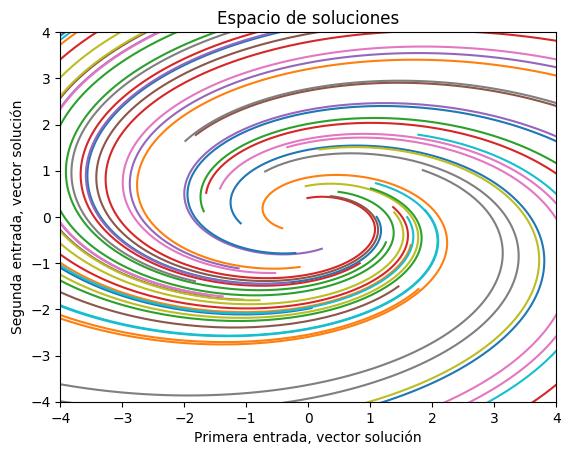

In [35]:
a,b,c,d=1,4,-2,1 #Declaramos nuestras variables
for i in 1:40
    ci_17=2*(2*rand(1)-1)
    ci_18=2*(2*rand(1)-1)
    vs_9=RungeKutta4(F,listat_ej5,[ci_17,ci_18])
    E5_e1_9=ent(vs_9,1) #Aplico la función ent que definí para obtener la primera entrada de la lista
    E5_e2_9=ent(vs_9,2) #Ahora la segunda entrada
    plot(E5_e1_9,E5_e2_9)
    xlim([-4,4]) #Tomamos de -4 a 4 el rango de x
    ylim([-4,4]) #Tomamos de -4 a 4 el rango de y
    title("Espacio de soluciones")
    xlabel("Primera entrada, vector solución")
    ylabel("Segunda entrada, vector solución")
end

Para $a=b=d=-1$, $c=0$ se tiene entonces:
$$\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}-1 & -1\\0 & -1\end{array}\right)$$

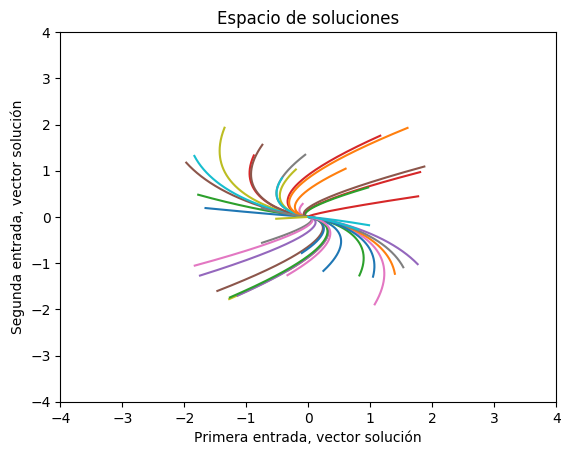

In [36]:
a,b,c,d=-1,-1,0,-1 #Declaramos nuestras variables
for i in 1:40
    ci_19=2*(2*rand(1)-1)
    ci_20=2*(2*rand(1)-1)
    vs_10=RungeKutta4(F,listat_ej5,[ci_19,ci_20])
    E5_e1_10=ent(vs_10,1) #Aplico la función ent que definí para obtener la primera entrada de la lista
    E5_e2_10=ent(vs_10,2) #Ahora la segunda entrada
    plot(E5_e1_10,E5_e2_10)
    xlim([-4,4]) #Tomamos de -4 a 4 el rango de x
    ylim([-4,4]) #Tomamos de -4 a 4 el rango de y
    title("Espacio de soluciones")
    xlabel("Primera entrada, vector solución")
    ylabel("Segunda entrada, vector solución")
end

Notamos una diversidad de comportamientos, en los dos primeros casos tendencias hacia una recta horizontal mientras que  en los demás $x=\left(0,0\right)$ puede ser el centro de soluciones como curvas cerradas, o bien el punto donde convergen espirales o curvas.

FIN